# **Load Libraries and Data**


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings


#**Initialise Global Functions and Values**

In [2]:
# Function to return metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['ROC-AUC Score'] = roc_auc_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    metrics['F1-Score'] = f1_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)

    return metrics


In [3]:
#list to metrics of all tables
metrics_table = list()

# **Load Public Datasets**

## Load dataset from Public Github Repository

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/ARP_MitM_sampled.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Active_Wiretap_sampled.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Fuzzing_sampled.csv')
df4 = pd.read_csv("https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Mirai_sampled.csv")
df5 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/OS_Scan_sampled.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSDP_Flood_sampled.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSL_Renegotiation_sampled.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SYN_DoS_sampled.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Video_Injection_sampled.csv')

## Display the file contents


### 📘 Core Data Structures in pandas

**`DataFrame`**  
A two-dimensional, tabular data structure with labeled axes (rows and columns). It's similar to a spreadsheet or a SQL table and is the most commonly used object in pandas for data manipulation and analysis.

**`Series`**  
A one-dimensional labeled array that can hold data of any type (integers, strings, floating point numbers, Python objects, etc.). It represents a single column or row in a DataFrame and includes an index.

---

### Loading Data from CSV

You can load a CSV file using the `pd.read_csv()` function. If your file is stored in a subdirectory (e.g., `data/`), use the relative path:

```python
df = pd.read_csv('data/filename.csv')




In [5]:
# displaying the contents of the XLSX file
df1 = df1.drop(['Unnamed: 0',	'index'], axis=1)
df1.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,179786.099514,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,181996.614142,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0


In [6]:
df2 = df2.drop(['Unnamed: 0',	'index'], axis=1)
df2.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,163.049513,1306.129759,133895.850037,283.632401,1305.573004,133300.917659,871.595910,1300.438768,137735.237195,...,57217.762833,1.914975e-09,1.143837e-07,27911.418879,1227.676709,237.573391,1229.142248,56441.116252,0.221214,0.001032
1,1,174.527618,1295.076626,145592.073006,295.358524,1297.920763,141931.132312,883.612806,1297.616196,140815.653256,...,183926.684931,0.000000e+00,0.000000e+00,26755.578455,1334.536548,427.019985,1335.884650,182346.067560,0.000000,0.000000


In [7]:
df3 = df3.drop(['Unnamed: 0',	'index'], axis=1)
df3.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,183.422791,1336.527256,190462.742960,291.849930,1336.289854,189878.320827,850.126451,1336.942110,187900.563560,...,179608.126627,0.0,0.0,28076.951594,1340.929813,425.522919,1340.929813,181069.754307,0.0,0.0
1,1,237.879413,1356.333015,175809.072163,346.842926,1347.008011,183339.520567,903.558706,1340.022021,187013.751527,...,183211.967235,0.0,0.0,28082.917849,1340.514610,426.459844,1340.514610,181867.998735,0.0,0.0


In [8]:
df4 = df4.drop(['0'], axis=1)
df4 = df4.drop(['Unnamed: 0',	'index'], axis=1)
df4.head(2)
# list(df4)


,x,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1,112.097168,60.035565,0.739410,153.541719,60.066094,1.315846,361.114006,60.101399,1.764327,...,5.002221e-12,0.0,0.0,20727.018620,60.0,0.000010,60.0,9.276846e-11,0.0,0.0
1,1,117.742473,60.138909,1.829893,162.204865,60.210187,2.786475,376.574119,60.236818,3.256390,...,4.092726e-12,0.0,0.0,22446.495481,60.0,0.000006,60.0,4.001777e-11,0.0,0.0


In [9]:
df5 = df5.drop(['Unnamed: 0',	'index'], axis=1)
df5.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,774.199578,60.0,5.002221e-12,1172.275787,60.0,8.640200e-12,3044.228765,60.0,2.273737e-12,...,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.0,0.0,0.0
1,1,732.896796,60.0,8.185452e-12,1160.217723,60.0,1.364242e-12,3296.988952,60.0,3.592504e-11,...,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,0.0,0.0,0.0


In [10]:
df6 = df6.drop(['Unnamed: 0',	'index'], axis=1)
df6.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.997162,830.381872,385019.472302,1.998296,830.029123,385019.970028,1.999432,829.676374,385020.218892,...,0.000000,0.0,0.0,1.000000,1450.000000,0.0,1450.000000,0.00,0.0,0.0
1,0,2.996940,586.005354,375805.676539,2.998163,585.869927,375719.284013,2.999387,585.734436,375632.816999,...,3080.249997,0.0,0.0,1.999994,153.499836,55.5,153.499836,3080.25,0.0,0.0


In [11]:
df7 = df7.drop(['Unnamed: 0',	'index'], axis=1)
df7.head(3)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,201.933924,751.076479,448315.216282,267.334718,749.056876,445832.685644,603.764783,745.692054,441529.126214,...,33157.526501,0.000000e+00,0.000000e+00,5889.520552,147.270744,179.537822,147.270744,32233.829699,0.000000e+00,0.000000e+00
1,0,275.855663,745.492465,441894.936067,408.565730,744.033612,439475.223524,1090.770627,742.309873,436848.814508,...,30043.252662,0.000000e+00,0.000000e+00,17746.423096,150.873977,179.105631,150.873977,32078.826919,0.000000e+00,0.000000e+00
2,0,45.069225,1416.091201,31374.311828,78.276855,1416.709773,30919.455107,253.852811,1412.537252,34984.757411,...,35626.304470,5.470622e-12,1.109738e-08,16501.769970,1411.756991,184.838747,1413.031423,34165.362231,1.418180e-11,1.060973e-08


In [12]:
# displaying the contents of the XLSX file
df8 = df8.drop(['Unnamed: 0',	'index'], axis=1)
df8.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.999868,773.955314,456975.998003,1.999921,773.973188,456975.999281,1.999974,773.991063,456975.999920,...,0.000000e+00,0.0,0.0,1.000000,98.0,0.000000,98.0,0.000000e+00,0.0,0.0
1,0,2.998371,999.425957,406159.137822,2.999023,999.388902,406175.842945,2.999674,999.351854,406192.541806,...,9.313226e-10,0.0,0.0,1.999998,1450.0,0.000022,1450.0,4.656613e-10,0.0,0.0


In [13]:
df9 = df9.drop(['Unnamed: 0',	'index'], axis=1)
df9.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.995812,862.869190,425754.375319,1.997485,862.321515,425755.575114,1.999161,861.773838,425756.175013,...,425756.249250,0.0,0.0,1.999992,861.502738,652.500000,861.502738,425756.249993,0.0,0.0
1,0,2.995771,1080.219198,377918.162404,2.997460,1079.731725,378131.164377,2.999153,1079.243977,378343.810605,...,378439.385077,0.0,0.0,2.999992,1079.002440,615.182037,1079.002440,378448.938548,0.0,0.0


## Merging Datasets

In [14]:
df1.columns = ['feature_'+str(i) for i in range(0,116)]
df2.columns = ['feature_'+str(i) for i in range(0,116)]
df3.columns = ['feature_'+str(i) for i in range(0,116)]
df4.columns = ['feature_'+str(i) for i in range(0,116)]
df5.columns = ['feature_'+str(i) for i in range(0,116)]
df6.columns = ['feature_'+str(i) for i in range(0,116)]
df7.columns = ['feature_'+str(i) for i in range(0,116)]
df8.columns = ['feature_'+str(i) for i in range(0,116)]
df9.columns = ['feature_'+str(i) for i in range(0,116)]

In [15]:
df1['attack']=1
df2['attack']=2
df3['attack']=3
df4['attack']=4
df5['attack']=5
df6['attack']=6
df7['attack']=7
df8['attack']=8
df9['attack']=9

In [16]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [17]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1
2,1,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,...,0.0,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1
3,1,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,...,0.0,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1
4,1,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,...,0.0,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1


# **Data Preprocessing**


### Importance of Data Preprocessing in Machine Learning

1. **Model Compatibility:**  
   Different machine learning algorithms require specific data formats to function effectively. For instance, some models require strictly numerical input, while others may work with categorical or image-based data. Preprocessing ensures that the raw data is appropriately transformed and structured to meet these requirements.

2. **Improved Accuracy and Reliability:**  
   Poor-quality data can lead to inaccurate predictions and unreliable outcomes. Data that contains inconsistencies, missing values, or noise can significantly affect a model’s performance. Preprocessing helps mitigate these issues, thereby improving the reliability and accuracy of the results.

3. **Data Efficiency:**  
   High-quality, preprocessed data allows machine learning models to perform better even with a smaller dataset. By reducing irrelevant or redundant features, preprocessing enhances the learning process and leads to more efficient training.

4. **Foundation for Successful Modeling:**  
   Effective preprocessing serves as the foundation of any machine learning project. It ensures that the data is not only clean and consistent but also informative, enabling models to learn meaningful patterns and generalize well to unseen data.



## Reset Column Names

In [18]:
df.columns = ['feature_'+str(i) for i in range(len(df.columns))]

In [19]:
df.columns.values[0]='label'
df.columns.values[-1]='attack'

In [20]:
cols = list(df)[1:]
cols.append('label')
# Reorder the columns
df = df[cols]

In [21]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,8708.282524,...,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1,1
1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,19614.490170,...,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1,1
2,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,19641.527990,...,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1,1
3,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,18836.905420,...,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1,1
4,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,8714.034018,...,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1,1


In [22]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,17994.000000,17998.000000,17998.000000
mean,590.001582,857.763041,179333.709871,971.216290,858.429179,178754.480328,2849.822370,859.490195,177962.861751,26083.685756,...,-0.000052,15135.163135,860.338704,220.391662,911.752972,8.622016e+04,-0.642570,-0.000201,4.999889,0.350317
std,1672.259132,525.861139,157456.903472,2786.477502,526.194303,157135.199378,8352.314584,526.723421,156845.310038,79552.427675,...,0.004580,12685.595423,608.959023,189.612557,590.260119,8.274561e+04,24.555470,0.006196,2.582183,0.477082
min,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,...,-0.276309,1.000000,52.000000,0.000000,52.000000,0.000000e+00,-2011.316691,-0.314397,1.000000,0.000000
25%,56.061229,136.000000,225.624024,86.288658,136.000000,304.027158,200.777767,136.000000,415.872886,1356.221785,...,0.000000,72.628172,136.000000,0.000007,150.507101,9.313226e-10,0.000000,0.000000,3.000000,0.000000
50%,139.743726,1231.631585,170520.674718,216.059493,1234.975971,173093.596850,574.416212,1236.700796,177195.319543,5216.721656,...,0.000000,17303.812382,1334.520728,221.765288,1335.198361,5.275406e+04,0.000000,0.000000,5.000000,0.000000
75%,243.685256,1328.156284,222725.513399,381.475034,1331.337628,213747.656584,1089.506496,1335.374246,204456.933708,10379.729109,...,0.000000,27960.225050,1341.307654,425.192396,1341.489508,1.807886e+05,0.000000,0.000000,7.000000,1.000000
max,7436.865335,1452.000000,488785.862233,12392.617904,1452.000000,488812.666765,37163.978483,1452.000000,488832.368521,354099.847565,...,0.347487,41243.896714,1452.000000,699.170575,1452.000000,4.888395e+05,3.472361,0.405684,9.000000,1.000000


## **Handling missing data**

Using `isna().sum()` function gives the sum of the null values preset in the dataset column-wise.

`fillna()` function will fill NA/NaN or 0 values in place of null spaces.
> `df["colName"].fillna("replacingValue", inplace = True)`

In [23]:
#check null values
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1


**Observation** : remove these 4 rows with null Values Found

In [24]:
df = df.dropna()
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label


In [25]:
df.shape

(17994, 117)

**Observation**: We are left with 17994 rows × 117 columns of data

In [26]:
from google.colab import files
# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)
# Download the Excel file to our local system
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Data Transformation**

### **Standardization**

### Feature Scaling Techniques in Machine Learning

Feature scaling is a crucial preprocessing step in machine learning, especially when using distance-based algorithms like **K-Means**, where features with larger ranges can dominate the clustering process. Two commonly used scaling methods are:

- **Min-Max Scaler:**  
  This technique scales the data to a fixed range, typically **[0, 1]**. Each feature is transformed using the following formula:
  \[
  X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  \]
  It is especially useful when the distribution of data is not Gaussian and when the goal is to preserve the relationships in the original data.

- **Standard Scaler (Z-score normalization):**  
  This method standardizes features by removing the mean and scaling to unit variance. The result is a distribution with a mean of **0** and a standard deviation of **1**:
  \[
  X_{\text{scaled}} = \frac{X - \mu}{\sigma}
  \]
  It is suitable when the data is normally distributed and needed for models that assume Gaussian distribution (e.g., logistic regression, linear regression).

**Why Scaling is Important:**  
Without scaling, features with larger numerical ranges can disproportionately influence the model’s performance. By applying feature scaling, we ensure that each variable contributes equally during model training, leading to more balanced and accurate results.


In [27]:
#Importing required modules
from sklearn.preprocessing import MinMaxScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_scaled = MinMaxScaler().fit_transform(df)

#view first five rows of scaled DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = list(df))
df_scaled.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.021686,0.882807,0.282223,0.022303,0.884730,0.285793,0.023171,0.887397,0.288297,0.024590,...,0.442948,0.681997,0.916876,0.609072,0.916876,0.370969,0.998277,0.436614,0.0,1.0
1,0.052012,0.895756,0.450343,0.051350,0.903378,0.424373,0.051752,0.914083,0.388512,0.055390,...,0.442948,0.680129,0.920714,0.608795,0.920714,0.370631,0.998277,0.436614,0.0,1.0
2,0.050897,0.925055,0.353282,0.051071,0.924065,0.359001,0.052239,0.921880,0.367928,0.055466,...,0.442948,0.672865,0.921081,0.607726,0.921081,0.369331,0.998277,0.436614,0.0,1.0
3,0.057480,0.916493,0.395575,0.054880,0.915483,0.390329,0.053018,0.917913,0.375188,0.053194,...,0.442948,0.677639,0.920797,0.608184,0.920797,0.369888,0.998277,0.436614,0.0,1.0
4,0.020196,0.876802,0.322438,0.021668,0.881588,0.309510,0.022989,0.884539,0.300800,0.024606,...,0.442948,0.683120,0.916204,0.610454,0.916204,0.372654,0.998277,0.436614,0.0,1.0


## **Handling (drop) outliers**


### Z-Score Method for Outlier Detection

The **Z-Score** is a statistical measurement that describes a data point's position relative to the mean of a group of values. It represents the number of standard deviations a value is from the mean:

\[
z = \frac{(X - \mu)}{\sigma}
\]

Where:  
- \(X\) is the data point  
- \(\mu\) is the mean of the dataset  
- \(\sigma\) is the standard deviation  

#### Interpretation of Z-Scores in a Normal Distribution:
In a standard normal distribution, the percentage of data points that fall within specific Z-score thresholds are as follows:

- **±1 standard deviation**: ~68% of the data  
- **±2 standard deviations**: ~95% of the data  
- **±3 standard deviations**: ~99.7% of the data  
- **±4 standard deviations**: ~99.9% of the data  

#### Outlier Removal Strategy:
Data points that lie beyond a specified Z-score threshold (e.g., ±3) are considered outliers. These extreme values can distort statistical analyses and model performance.  
Hence, we remove all rows where the absolute Z-score exceeds the chosen threshold to enhance data quality and improve model accuracy.


In [28]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df_scaled, nan_policy='omit'))
z_scores.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.255799,0.818048,0.262855,0.249009,0.821379,0.248551,0.237991,0.825628,0.236125,0.218421,...,0.011281,1.024291,0.780513,1.083575,0.718132,1.149629,0.026169,0.032363,1.548927,1.361922
1,0.120947,0.852522,0.259046,0.119837,0.870994,0.182551,0.110820,0.896559,0.076221,0.081322,...,0.011281,1.018217,0.789338,1.082553,0.727237,1.147635,0.026169,0.032363,1.548927,1.361922
2,0.125902,0.930527,0.042265,0.121073,0.926038,0.020811,0.108651,0.917285,0.012063,0.080982,...,0.011281,0.994598,0.790182,1.078612,0.728107,1.139955,0.026169,0.032363,1.548927,1.361922
3,0.096631,0.907731,0.089028,0.104135,0.903203,0.076646,0.105187,0.906741,0.034691,0.091097,...,0.011281,1.010123,0.789528,1.080300,0.727433,1.143243,0.026169,0.032363,1.548927,1.361922
4,0.262423,0.802060,0.138013,0.251836,0.813020,0.174771,0.238799,0.818032,0.197154,0.218348,...,0.011281,1.027942,0.778969,1.088671,0.716539,1.159587,0.026169,0.032363,1.548927,1.361922


In [29]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df_scaled.shape[0]} rows")

 No. of outlier rows = 2506 from total 17994 rows


**Observation:** :  No. of outlier rows = 2506 from total 17994 rows

Outlier removal step

In [30]:
df_zscored = df_scaled[mask]
df_zscored.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.021686,0.882807,0.282223,0.022303,0.884730,0.285793,0.023171,0.887397,0.288297,0.024590,...,0.442948,0.681997,0.916876,0.609072,0.916876,0.370969,0.998277,0.436614,0.0,1.0
1,0.052012,0.895756,0.450343,0.051350,0.903378,0.424373,0.051752,0.914083,0.388512,0.055390,...,0.442948,0.680129,0.920714,0.608795,0.920714,0.370631,0.998277,0.436614,0.0,1.0
3,0.057480,0.916493,0.395575,0.054880,0.915483,0.390329,0.053018,0.917913,0.375188,0.053194,...,0.442948,0.677639,0.920797,0.608184,0.920797,0.369888,0.998277,0.436614,0.0,1.0
4,0.020196,0.876802,0.322438,0.021668,0.881588,0.309510,0.022989,0.884539,0.300800,0.024606,...,0.442948,0.683120,0.916204,0.610454,0.916204,0.372654,0.998277,0.436614,0.0,1.0
5,0.049525,0.927026,0.348894,0.050394,0.927694,0.346782,0.051844,0.926265,0.352461,0.055374,...,0.442948,0.679610,0.920827,0.608554,0.920827,0.370338,0.998277,0.436614,0.0,1.0


In [31]:
df_zscored.shape

(15488, 117)

15488 rows of clean data are present


# **Model Building**

In [32]:

# Split the dataset into training and testing sets
X = df_scaled.drop(['attack', 'label'], axis=1) # features
y = df_scaled['label'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Feature Selection**

###  Feature Selection for Dimensionality Reduction

Given that the dataset contains **115 feature columns**, it is essential to reduce the dimensionality to enhance the model’s performance and mitigate the risk of overfitting. High-dimensional data can increase computational complexity and may lead to poor generalization on unseen data.

To address this, **feature selection techniques** are employed to identify and retain only the most relevant features that contribute significantly to the predictive performance.

Commonly used methods include:

- **Correlation Analysis**: Identifies and removes features that are highly correlated with each other, preserving only one representative from a group of correlated variables.
- **Mutual Information**: Measures the dependency between each feature and the target variable, helping to prioritize features that provide the most information gain.
- **Feature Importance (Tree-based Models)**: Models like Random Forest or Gradient Boosting provide intrinsic feature importance scores that can guide the selection of impactful features.

By selecting only the most relevant features, we streamline the dataset, reduce noise, and enhance both the efficiency and effectiveness of machine learning algorithms.


###Correlation Analysis

### Understanding Correlation with `corr()` Method

The `.corr()` method in pandas generates a **correlation matrix**, which is a table showing the pairwise correlation coefficients between numerical columns in a dataset. These coefficients quantify how strongly two variables are related.

The correlation values range from **-1 to 1**, where:

- **1** indicates a **perfect positive correlation**: As one variable increases, the other increases proportionally.
- **0.9** signifies a **strong positive correlation**: An increase in one variable is likely to result in an increase in the other.
- **-0.9** denotes a **strong negative correlation**: As one variable increases, the other is likely to decrease.
- **0.2** reflects a **weak or no correlation**: Changes in one variable do not reliably predict changes in the other.

> Note: High correlations (positive or negative) suggest redundancy, and in such cases, one of the correlated features can often be removed to simplify the model.

This matrix is particularly useful in **feature selection**, where we aim to eliminate multicollinearity and retain the most relevant predictors for machine learning tasks.


In [33]:
len(list(df_scaled))

117

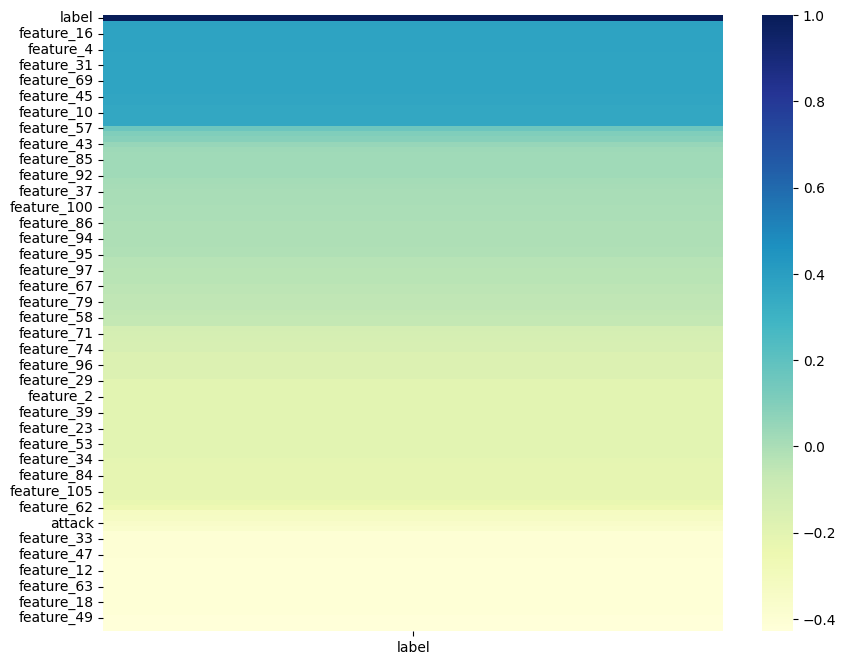

In [34]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
corr = ((df_scaled.corr().iloc[:,-1]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()
# sns.heatmap(corr, annot=True)

**Observation**
Below is the list of columns with **low** correlation with the label. ie. (-0.3 < corr < 0.3) . These are not good candidates for predictions

In [35]:
corr[(corr["label"] > -0.3) & (corr["label"] < 0.3)]


,label
feature_57,0.159539
feature_109,0.103435
feature_50,0.085780
feature_43,0.046523
feature_102,0.032101
...,...
feature_98,-0.214617
feature_105,-0.215071
feature_112,-0.215395
feature_55,-0.228069


**Observation**
Below is the list of columns with **high** correlation with the label. ie. (corr <= -0.3) or (corr >= 0.3) . These are good Candidates for predictions

In [36]:
corr[(corr["label"] <= -0.3) | (corr["label"] >= 0.3)]

,label
label,1.000000
feature_28,0.381291
feature_13,0.377549
feature_16,0.376207
feature_1,0.376136
feature_19,0.374953
feature_4,0.374840
feature_78,0.373190
feature_59,0.373190
feature_31,0.372689


### Observation

Correlation-based feature selection can be particularly useful when there is **prior knowledge or intuition** about certain features being relevant to the target variable — especially in cases where the underlying relationships are not explicitly known in the dataset.

However, it is essential to recognize that **correlation does not imply causation**. A high correlation between two variables does not guarantee that one causes the other. Therefore, while correlation can guide feature selection, the features identified may not always be the most **predictive or impactful** ones in a machine learning context.

> Best practice: Combine correlation analysis with other feature selection methods (e.g., mutual information, tree-based feature importance) to make more informed decisions.


### SelectKBest

### Best Practice: When to Apply SelectKBest

It is recommended to apply **SelectKBest** **after splitting** the dataset into training and testing sets. This approach ensures that **feature selection is performed solely on the training data**, preserving the integrity and fairness of the model evaluation process.

If feature selection is applied **before** splitting the data, it can lead to **data leakage**, where information from the test set unintentionally influences the feature selection process. This results in **optimistically biased performance metrics**, as the model may inadvertently "see" parts of the test data during training.

By selecting features based only on the **training set**, we:

- Maintain the **objectivity** of our test set.
- Reduce the risk of **overfitting**.
- Improve the **generalizability** of our model to unseen data.

> Always split the data first, then apply feature selection methods like `SelectKBest` only to the training set.


In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection and engineering
selector = SelectKBest(f_classif, k=50)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

### Observation

The **SelectKBest** method offers a more objective approach to feature selection compared to relying solely on correlation analysis. It can potentially uncover more predictive features by evaluating their individual statistical relationships with the target variable.

However, selecting an appropriate value for **`k`**—the number of top features to retain—is crucial. Choosing too few may omit important information, while choosing too many could lead to **overfitting** and reduced generalization.

In our case, **correlation analysis** revealed that approximately **44 features** had strong associations with the target label. Based on this insight, we selected **`k = 50`** for the `SelectKBest` function to retain a slightly broader range of influential features.


## GridSearchCV

### GridSearchCV for Hyperparameter Tuning

`GridSearchCV` is a powerful tool used to optimize machine learning models by exhaustively searching through a specified parameter grid. It evaluates the performance of the model for **every possible combination of hyperparameters** using **cross-validation** (e.g., `cv=5`), and identifies the set of hyperparameters that result in the best performance.

#### Advantages of GridSearchCV:
- Ensures a **systematic and thorough search** over hyperparameter values.
- Helps in **improving model performance** on unseen data by selecting hyperparameters that generalize well.
- Aids in **preventing overfitting** by using cross-validation during the tuning process.

####Key Attributes:

- **`grid_search.best_score_`**:  
  Returns the **mean cross-validated score** of the best-performing model.  
  This score represents the average performance across all folds in cross-validation using the optimal set of hyperparameters.

- **`grid_search.best_params_`**:  
  Returns a **dictionary** containing the best combination of hyperparameters found.  
  These can be used to **retrain the model** on the full training set for final evaluation or deployment.

Using `GridSearchCV` ensures that we systematically explore the hyperparameter space and choose the configuration that leads to the **most reliable and robust performance**.





## **Logistic Regression**



### Logistic Regression

Logistic Regression is a widely-used **classification algorithm** primarily suited for **binary classification problems**. It is a **linear model** that estimates the **probability** of a given input belonging to a particular class (typically the positive class).

Unlike linear regression, which outputs continuous values, logistic regression applies the **logistic (sigmoid) function** to the linear combination of input features to constrain the output between **0 and 1**. This output can then be interpreted as a probability.

#### Key Characteristics:
- **Used for classification**, not regression, despite the name.
- Works well when there is a **linear relationship** between the input features and the log-odds of the target variable.
- Assumes **no complex interactions** or multicollinearity among features.
- The decision boundary is **linear** in nature.

####  When to Use:
- When your target variable is **binary** (e.g., 0 or 1).
- When the **features are independent** and the relationship is approximately linear.
- When a **probability estimate** of class membership is useful for decision-making.

Logistic Regression is a great baseline algorithm due to its **simplicity**, **interpretability**, and **efficiency** in handling large datasets.
.

In [38]:
# Train and evaluate logistic regression
metrics_table = list()
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500],
}


# Create an instance of the model
logreg = LogisticRegression()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1  )

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_logreg =LogisticRegression(**grid_search.best_params_)

#Train the model on the training data
best_logreg.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_logreg = best_logreg.predict(X_test)

#get the Performance metrics by method created above
metric_logreg = get_model_metrics(model_name="LogisticRegression", y_true=y_test, y_pred = y_pred_logreg)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_logreg)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_logreg, orient='index', columns=['Value'])


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8209795067731852


,Value
Model,LogisticRegression
Accuracy,0.82384
ROC-AUC Score,0.781393
Precision,0.80746
Recall,0.643891
F1-Score,0.716458
Kappa,0.591028
MCC,0.598995


##Decision Tree Classifier

Decision trees are a non-parametric model that can handle both continuous and categorical data. They are easy to interpret and visualize, which makes them useful for understanding how the model makes decisions.



In [39]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create an instance of the model
dt = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Create an instance of the model with the best parameters
best_dt = DecisionTreeClassifier(**grid_search.best_params_)

# Train the model on the training data
best_dt.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_dt = best_dt.predict(X_test)

# Get the Performance metrics by method created above
metric_dt = get_model_metrics(model_name="DecisionTreeClassifier", y_true=y_test, y_pred = y_pred_dt)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_dt)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_dt, orient='index', columns=['Value'])


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.9631816602987149


,Value
Model,DecisionTreeClassifier
Accuracy,0.964712
ROC-AUC Score,0.960901
Precision,0.949316
Recall,0.948553
F1-Score,0.948934
Kappa,0.921976
MCC,0.921976


##Random Forest Classifier

Random Forest is an ensemble model that uses multiple decision trees to make predictions. It is a robust and flexible algorithm that works well with high-dimensional datasets.

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Create an instance of the model
rf = RandomForestClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# #Train the model on the training data
# rf.fit(X_train, y_train)

# #Calculate predictions on Model
# y_pred_rf = rf.predict(X_test)

# Train and evaluate the model with the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="RandomForestClassifier", y_true=y_test, y_pred = y_pred_rf)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])



Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9702674539770755


,Value
Model,RandomForestClassifier
Accuracy,0.97277
ROC-AUC Score,0.969712
Precision,0.961353
Recall,0.959807
F1-Score,0.960579
Kappa,0.939781
MCC,0.939782


##Gradient Boosting Classifier

Gradient Boosting is also an ensemble model that combines multiple weak models to make a strong prediction. It is a powerful algorithm that works well with large datasets and provides high accuracy.

In [41]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Create an instance of the model
gb = GradientBoostingClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_gb = GradientBoostingClassifier(**grid_search.best_params_)

# Train the model on the training data
best_gb.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_gb = best_gb.predict(X_test)

# Get the Performance metrics by method created above
metric_gb = get_model_metrics(model_name="GradientBoostingClassifier", y_true=y_test, y_pred=y_pred_gb)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_gb)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_gb, orient='index', columns=['Value'])


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.9661688086141021


,Value
Model,GradientBoostingClassifier
Accuracy,0.966657
ROC-AUC Score,0.963335
Precision,0.951043
Recall,0.952572
F1-Score,0.951807
Kappa,0.926319
MCC,0.926319


##Support Vector Machine Classifier

SVM is a powerful algorithm that works well for high-dimensional datasets. It maps the data to a higher-dimensional space and tries to find a hyperplane that maximizes the margin between the two classes.

In [42]:
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an instance of the model
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training data with the best hyperparameters
best_svm = SVC(**grid_search.best_params_)
best_svm.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_svm = best_svm.predict(X_test)

#get the Performance metrics by method created above
metric_svm = get_model_metrics(model_name="SupportVectorMachine", y_true=y_test, y_pred = y_pred_svm)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_svm)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_svm, orient='index', columns=['Value'])



,Value
Model,SupportVectorMachine
Accuracy,0.791609
ROC-AUC Score,0.759609
Precision,0.717047
Recall,0.655949
F1-Score,0.685139
Kappa,0.529868
MCC,0.531042


#**Model Evaluation**

### Model Selection Strategy

When selecting a machine learning model, it is crucial to consider the **trade-offs between model complexity, interpretability, performance, and computational efficiency**. Simpler models, such as Logistic Regression, offer high interpretability but may lack the capacity to capture complex relationships in the data. On the other hand, more complex models like Random Forests or Gradient Boosting Machines may achieve higher performance but are less interpretable and require more computational resources.

To make an informed decision, multiple models should be trained and evaluated on a **validation set** using appropriate metrics such as:

- **Accuracy** – Overall correctness of the model
- **Precision** – Correctness of positive predictions
- **Recall** – Coverage of actual positive instances
- **F1-Score** – Harmonic mean of precision and recall
- **ROC-AUC** – Trade-off between true positive rate and false positive rate

By comparing these evaluation metrics, we can identify the model that best meets our **project objectives and resource constraints**. This ensures that the final model is not only accurate but also practical and scalable for real-world deployment.


## Evaluation Metrics

In [43]:
#To choose the best model let us display our conclusive metric
# highlight maximum value of each column
metric_df = pd.DataFrame(metrics_table)
metric_df.style.highlight_max(axis=0, subset=metric_df.columns[1:])

,Model,Accuracy,ROC-AUC Score,Precision,Recall,F1-Score,Kappa,MCC
0,LogisticRegression,0.823840,0.781393,0.807460,0.643891,0.716458,0.591028,0.598995
1,DecisionTreeClassifier,0.964712,0.960901,0.949316,0.948553,0.948934,0.921976,0.921976
2,RandomForestClassifier,0.972770,0.969712,0.961353,0.959807,0.960579,0.939781,0.939782
3,GradientBoostingClassifier,0.966657,0.963335,0.951043,0.952572,0.951807,0.926319,0.926319
4,SupportVectorMachine,0.791609,0.759609,0.717047,0.655949,0.685139,0.529868,0.531042


### Model Evaluation: RandomForestClassifier as the Best Performing Model

**Observation:**  
Among all evaluated models, the **RandomForestClassifier** demonstrated superior performance in predicting network intrusion activities.

---

#### Justification for Selection:

1. **📊 Highest F1 Score**  
   A high F1 score reflects a strong balance between **precision** and **recall**. This implies that the model effectively identifies actual attacks (true positives) while minimizing both false positives and false negatives. In cybersecurity contexts, this balance is crucial to avoid missing real threats or triggering excessive false alarms.

2. **Highest AUC (Area Under the ROC Curve)**  
   The AUC score quantifies the model’s ability to distinguish between classes across all threshold values. A higher AUC indicates that the model maintains a **strong trade-off between sensitivity (true positive rate) and specificity (true negative rate)**. Since both false positives and false negatives are critical in intrusion detection, a high AUC signifies robustness.

3. **Highest MCC (Matthews Correlation Coefficient)**  
   Unlike F1 score, MCC takes into account all four confusion matrix categories: TP, TN, FP, and FN. It offers a **balanced evaluation even with imbalanced datasets**, making it ideal for network intrusion tasks. A high MCC confirms that the model is performing well across all prediction categories.

4. ** Highest Accuracy**  
   While accuracy alone can be misleading, especially in imbalanced datasets, the RandomForestClassifier also achieved the **highest accuracy** alongside high F1, AUC, and MCC. This consistency across metrics indicates a **win-win scenario**, demonstrating reliability in both majority and minority class predictions.

---

**Conclusion:**  
Given its consistently high scores across **multiple evaluation metrics**, the RandomForestClassifier emerges as the most effective model for this dataset and use case. It offers a robust, balanced, and interpretable solution for network intrusion detection.


##Visualize the best Model RandomForestClassifier's predictions

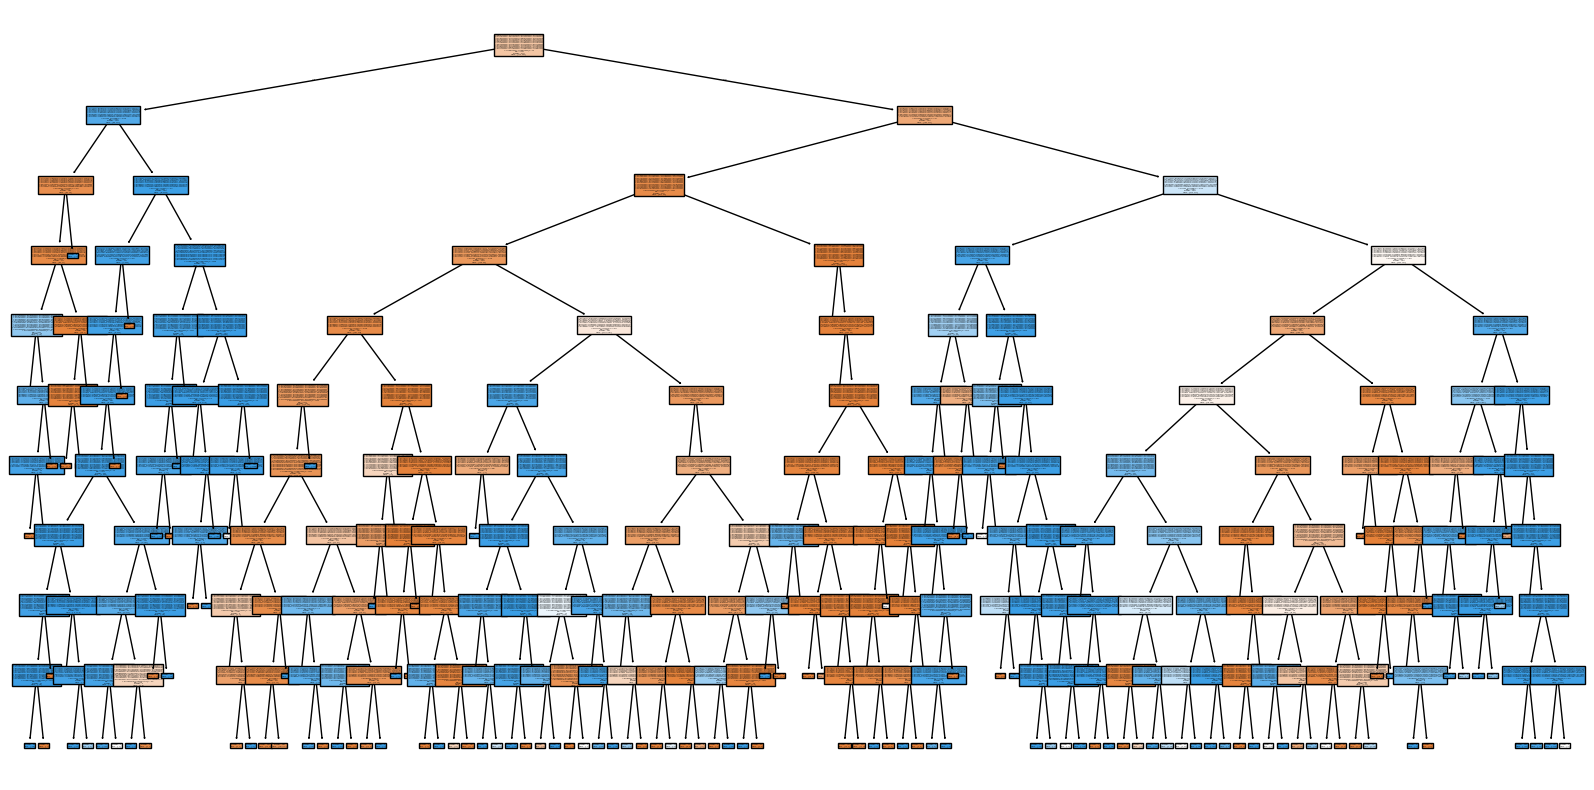

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the first decision tree in the random forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], feature_names=list(X_train), filled=True)
plt.show()


# Reflections

###  Project Workflow Overview: Network Intrusion Detection using Kitsune Model

####  Model Justification:
The decision to adopt the **Kitsune** framework was based on its efficiency, scalability, and real-time anomaly detection capabilities. Kitsune, which utilizes an ensemble of autoencoders, excels at identifying both **known and previously unseen (zero-day)** network attacks. Its lightweight nature and ability to perform well under streaming data conditions make it highly suitable for deployment in live network environments. Comparative evaluations highlighted Kitsune’s superior performance in terms of detection accuracy and adaptability, setting it apart from traditional models.

#### Data Preprocessing:
To ensure optimal performance of the Kitsune model, **extensive preprocessing** was performed:
- Missing or corrupt entries were identified and removed.
- Features were **standardized or normalized** to fall within a uniform range, enhancing model convergence.
- Attack labels were encoded to facilitate supervised learning for evaluation.
This stage ensured the model received clean, structured, and meaningful inputs.

#### Exploratory Data Analysis (EDA):
EDA was conducted to derive insights into the nature of network traffic. **Correlation matrices** and **heatmaps** were used to uncover relationships among features. This helped in identifying redundant or highly correlated features that could be dropped or transformed. Patterns in benign vs. malicious traffic were analyzed to inform the feature selection process and model tuning.

####  Model Training Strategy:
The model training pipeline involved:
- Splitting the dataset into **training and validation** sets.
- Training Kitsune along with other benchmark models including:
  - Logistic Regression  
  - Decision Tree Classifier  
  - Random Forest Classifier  
  - Gradient Boosting Classifier  
  - Support Vector Machine (SVM)  
- Applying regularization and hyperparameter tuning to address overfitting and instability.
Cross-validation was used to ensure model generalization across different data folds.

#### Model Performance Evaluation:
Each model was assessed using metrics like **accuracy, precision, recall**, and **F1-score**. The **Random Forest Classifier** emerged as the top performer on the test set due to its robustness and high detection capability, especially with imbalanced classes. Kitsune also maintained high performance and showcased its strength in real-time adaptability and detection of unseen anomalies.

####Model Deployment Considerations:
Real-world deployment of Kitsune demands awareness of:
- **Network structure and traffic patterns**
- **System resource constraints** and processing capabilities
- **Integration with existing security protocols**
Kitsune can complement traditional Intrusion Detection Systems (IDS) by catching advanced or stealthy attacks. However, deploying it effectively requires skilled personnel and a well-architected infrastructure.

####Future Enhancements:
Potential areas for development include:
- Reducing dependency on large labeled datasets by exploring **semi-supervised or unsupervised approaches**.
- Enhancing resilience to hyperparameter changes through **automated tuning** methods.
- Combining Kitsune with other detection models to build a **hybrid ensemble IDS**.
- Incorporating **deep learning architectures** like LSTM for time-aware threat detection.

---
This comprehensive workflow showcases the applicability and effectiveness of the Kitsune-based approach in modern network security analysis.
.


